In [1]:
from ib_insync import *
util.startLoop()  # uncomment this line when in a notebook
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import datetime

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)

<IB connected to 127.0.0.1:7497 clientId=1>

## Get stock price

In [3]:
contract = Stock("AAPL", exchange="NYSE")

In [4]:
historical_bars = ib.reqHistoricalData(
    contract,
    endDateTime = "",
    durationStr = "1 M",
    barSizeSetting = "1 day",
    whatToShow = "MIDPOINT",
    useRTH = False,
    formatDate = 1
)

df = util.df(historical_bars)
print(df)

          date    open    high     low   close  volume  average  barCount
0   2024-01-18  186.17  190.94  181.57  188.92    -1.0     -1.0        -1
1   2024-01-19  189.20  194.03  184.08  191.59    -1.0     -1.0        -1
2   2024-01-22  191.98  197.10  191.97  193.90    -1.0     -1.0        -1
3   2024-01-23  194.64  195.78  193.81  195.12    -1.0     -1.0        -1
4   2024-01-24  195.38  200.26  191.03  194.53    -1.0     -1.0        -1
5   2024-01-25  194.28  199.74  190.54  194.22    -1.0     -1.0        -1
6   2024-01-26  194.24  198.98  189.37  192.40    -1.0     -1.0        -1
7   2024-01-29  192.03  194.45  187.23  191.78    -1.0     -1.0        -1
8   2024-01-30  190.56  195.36  185.78  187.99    -1.0     -1.0        -1
9   2024-01-31  187.14  191.47  182.44  184.40    -1.0     -1.0        -1
10  2024-02-01  185.32  190.08  179.59  186.89    -1.0     -1.0        -1
11  2024-02-02  180.93  187.61  175.09  185.82    -1.0     -1.0        -1
12  2024-02-05  187.16  193.02  182.49

In [5]:
historical_bars = ib.reqHistoricalData(1, contract, "", "1 D", "1 day", "EPS", 1, 1, False, [])

AttributeError: 'int' object has no attribute 'includeExpired'

## Get fundamentals

In [1]:
def get_fundamental(report_type='RESC'):
    """
    reqId	the request's unique identifier.
    contract	the contract's description for which the data will be returned.
    reportType	there are three available report types:

        ReportSnapshot: Company overview
        ReportsFinSummary: Financial summary
        ReportRatios: Financial ratios
        ReportsFinStatements: Financial statements
        RESC: Analyst estimates
    """

    fundamentals = ib.reqFundamentalData(contract, reportType=report_type) # data comes in xml format
    root = ET.fromstring(fundamentals)

    tree = ET.ElementTree(root)
    tree.write(f'{report_type}.xml', encoding='utf-8', xml_declaration=True)

    return root

    # with open('output.xml', 'w') as f:
    #     f.write(soup.prettify())
    # fundamentals_snapshot = ib.reqFundamentalData(contract, reportType='ReportSnapshot') # only the latest year?

def plot_fundamental(root, metrics='BVPS', resolution='Q'):
    """
    resolution = Q (quarterly) or A (annual)
    metrics: any metrics supported. e.g. BVPS
    """

    # Initialize dictionaries to store EBIT values by month
    dates = []
    values = []

    assert resolution == 'Q' or 'A', f"{resolution=} is not supported. Please choose either 'Q' or 'A'"
    # Iterate through FYActual elements
    for fy_actual in root.findall(f'.//FYActual[@type="{metrics}"]'):
        # Iterate through FYPeriod elements
        for fy_period in fy_actual.findall('FYPeriod'):
            if fy_period.get('periodType') == resolution:
                end_year = int(fy_period.get('fYear'))
                end_month = int(fy_period.get('endMonth'))
                values.append(float(fy_period.find('ActValue').text))
                date = datetime.strptime(f"{end_year}-{end_month}", "%Y-%m")
                dates.append(date)


    # Sort the dates from old to recent
    sorted_dates, sorted_values = zip(*sorted(zip(dates, values)))

    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_dates, sorted_values, marker='o', linestyle='-')
    plt.title(f'{metrics} Over Time')
    plt.xlabel('Date')
    # plt.ylabel('BVPS (Unit)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

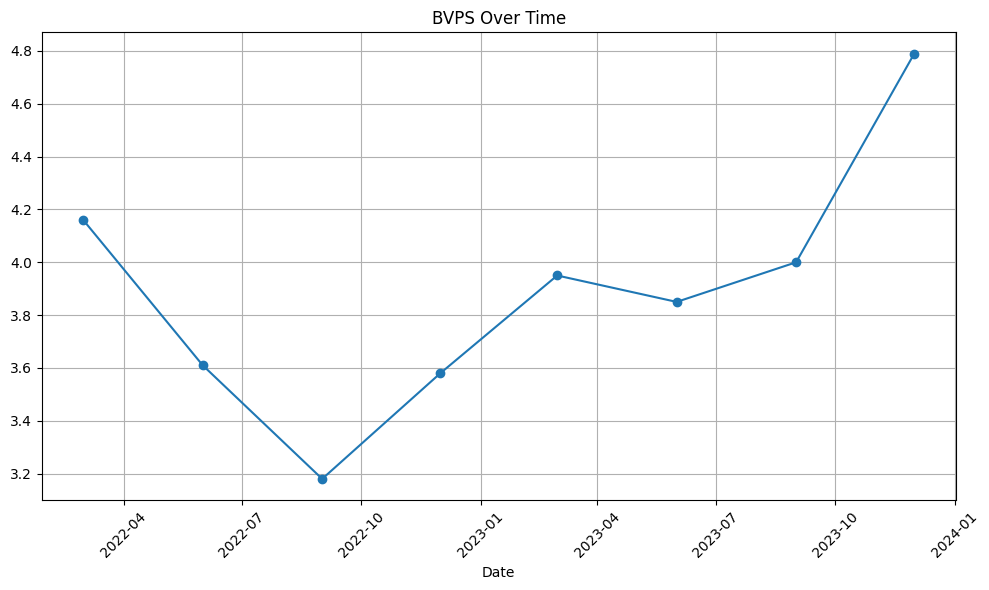

In [36]:
root = get_fundamental('RESC')
plot_fundamental(root, 'BVPS', 'Q') # Book-value Per Share

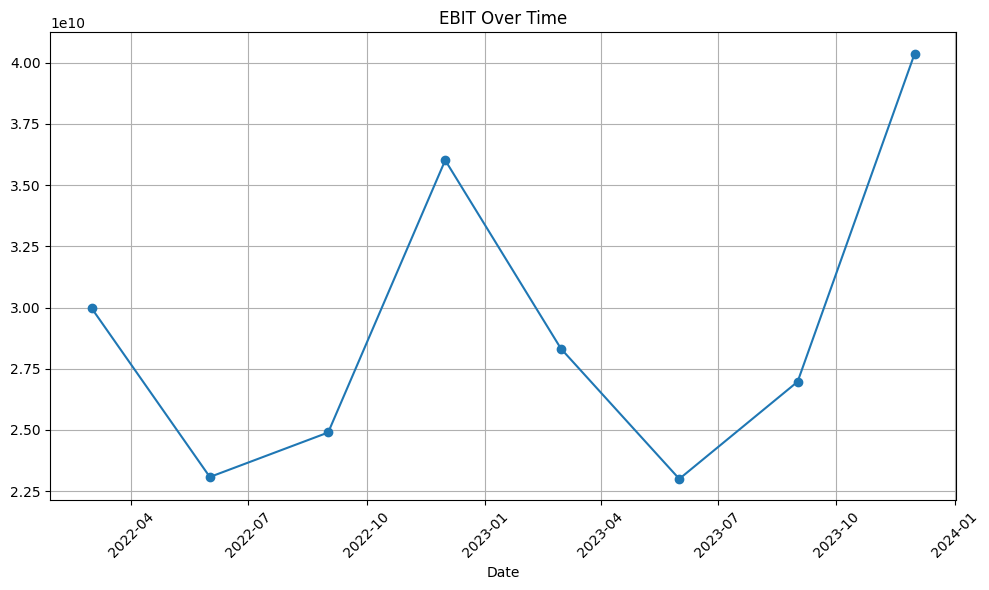

In [37]:
plot_fundamental(root, 'EBIT', 'Q') # Earning Before Interest & Taxes

In [2]:
from ib_insync import *
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import datetime
util.startLoop()  # uncomment this line when in a notebook
ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)
contract = Stock("AAPL", exchange="NYSE")
root = get_fundamental('RESC')
plot_fundamental(root, 'BVPS', 'Q') # Book-value Per Share

NameError: name 'datetime' is not defined